<a href="https://colab.research.google.com/github/Bobby5010/Twitter_sentiment_analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # Text classification using TF-IDF measurement and prediciting through Naive Bayes ,SVM and Logistic Regression models


# Importing required libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LogisticRegressionCV


np.random.seed(500)
#df=pd.read_excel(r'G:\TROP ICSU INTERNSHIP\tweet_global_warming.xlsx',engine='openpyxl')
df = pd.read_excel("tweet_global_warming.xlsx")

# Exploratory Data Analysis

In [ ]:
df.head()

,tweet,existence,existence.confidence,Unnamed: 3,Unnamed: 4
0,Global warming report urges governments to act...,Yes,1.0000,Yes,510.0
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,Y,2518.0
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,No,58.0
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,N,1047.0
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,NaN,1379.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet                 5960 non-null   object 
 1   existence             4133 non-null   object 
 2   existence.confidence  5957 non-null   float64
 3   Unnamed: 3            4 non-null      object 
 4   Unnamed: 4            6 non-null      float64
dtypes: float64(2), object(3)
memory usage: 232.9+ KB


In [ ]:
#cleaning the existence column i.e classifing all the similar meaning words as one word

import warnings
warnings.filterwarnings('ignore')

df['existence'].fillna("neutral",inplace = True)
df.existence
for i in range(0,5960):
    if df['existence'][i]=='Y':
        df['existence'][i]='yes'
    if df['existence'][i]=='Yes':
        df['existence'][i]='yes'
    if df['existence'][i]=='No':
        df['existence'][i]='no'
    if df['existence'][i]=='N':
        df['existence'][i]='no'


# Pie chart visualization of Positive Negative and Neutral tweets

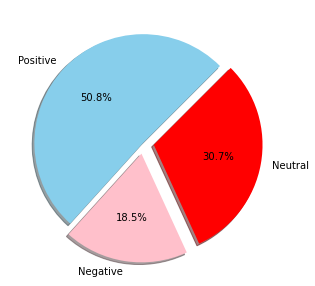

In [ ]:

fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink','red']
pos=df[df['existence']=='yes']
neg=df[df['existence']=='no']
neutral=df[df['existence']=='neutral']
ck=[pos['existence'].count(),neg['existence'].count(),neutral['existence'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative","Neutral"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1,0.1))

# Data pre-processing

In [ ]:
#remove_url
import string
def remove_url(thestring):
    URLless_string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', thestring)
    return URLless_string
df['tweet']=df['tweet'].apply(lambda x:remove_url(x))

#remove_html
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
            return text
df['tweet']=df['tweet'].apply(preprocessor)

#-------------
result=string.punctuation
print(result)
#-------------

#remove punctuations
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s
df['tweet'] = df['tweet'].apply(remove_punctuation)
df.head()



!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,tweet,existence,existence.confidence,Unnamed: 3,Unnamed: 4
0,global warming report urges governments to act...,yes,1.0000,Yes,510.0
1,fighting poverty and global warming in africa ...,yes,1.0000,Y,2518.0
2,carbon offsets how a vatican forest failed to ...,yes,0.8786,No,58.0
3,carbon offsets how a vatican forest failed to ...,yes,1.0000,N,1047.0
4,uruguay tools needed for those most vulnerable...,yes,0.8087,NaN,1379.0


In [ ]:
#tokenizing the words in sentences
tokenizer=RegexpTokenizer('\w+')

df['after_tokenizer']=df['tweet'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['after_tokenizer'][0]

['global',
 'warming',
 'report',
 'urges',
 'governments',
 'to',
 'act',
 'brussels',
 'belgium',
 'ap',
 'the',
 'world',
 'faces',
 'increased',
 'hunger',
 'and',
 'link']

In [ ]:
#removing unwanted words by stopwords
stoplist=stopwords.words('english')
stoplist.append('link')  #adding unwanted words to stoplist

def remove_stopwords(text):
    words=[w for w in text if w not in stoplist and w.isalpha()]
    return words
df['stopword']=df['after_tokenizer'].apply(lambda x:remove_stopwords(x))
df.head()

,tweet,existence,existence.confidence,Unnamed: 3,Unnamed: 4,after_tokenizer,stopword
0,global warming report urges governments to act...,yes,1.0000,Yes,510.0,"[global, warming, report, urges, governments, ...","[global, warming, report, urges, governments, ..."
1,fighting poverty and global warming in africa ...,yes,1.0000,Y,2518.0,"[fighting, poverty, and, global, warming, in, ...","[fighting, poverty, global, warming, africa]"
2,carbon offsets how a vatican forest failed to ...,yes,0.8786,No,58.0,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red..."
3,carbon offsets how a vatican forest failed to ...,yes,1.0000,N,1047.0,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red..."
4,uruguay tools needed for those most vulnerable...,yes,0.8087,NaN,1379.0,"[uruguay, tools, needed, for, those, most, vul...","[uruguay, tools, needed, vulnerable, climate, ..."


In [ ]:
#nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=" ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text
df['lemmatize']=df['stopword'].apply(word_lemmatizer)
df['lemmatize']

0       global warming report urge government act brus...
1                  fighting poverty global warming africa
2       carbon offset vatican forest failed reduce glo...
3       carbon offset vatican forest failed reduce glo...
4           uruguay tool needed vulnerable climate change
                              ...                        
5955    bloodlesscoup phrase global warming abandoned ...
5956    virginia investigate global warming scientist ...
5957           global warming tube parody enjoy ipcc ocra
5958    one eyed golfer dare tell global warming twent...
5959    man made global warming hair brained theory sc...
Name: lemmatize, Length: 5960, dtype: object

In [ ]:
#combining the words in a sentence after lemmatization
stemmer =PorterStemmer()
def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i) for i in text])
    return stem_text
df['stem']=df['stopword'].apply(lambda x:word_stemmer(x))
df.head()
df['stem']


0       global warm report urg govern act brussel belg...
1                        fight poverti global warm africa
2       carbon offset vatican forest fail reduc global...
3       carbon offset vatican forest fail reduc global...
4                   uruguay tool need vulner climat chang
                              ...                        
5955    bloodlesscoup phrase global warm abandon favor...
5956         virginia investig global warm scientist mann
5957              global warm tube parodi enjoy ipcc ocra
5958    one eye golfer dare tell global warm twenti fi...
5959    man made global warm hair brain theori scienti...
Name: stem, Length: 5960, dtype: object

# Analysing text after pre-processing

**Wordcloud for  Positive and Negative Tweets**

Positive words are as follows


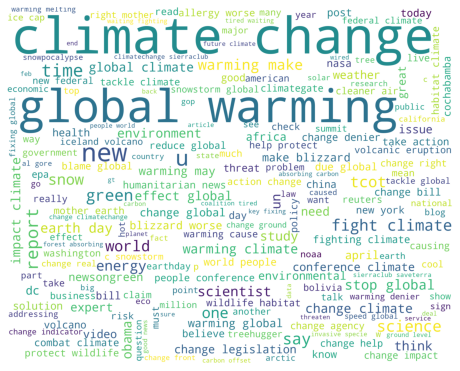

Negative words are as follows


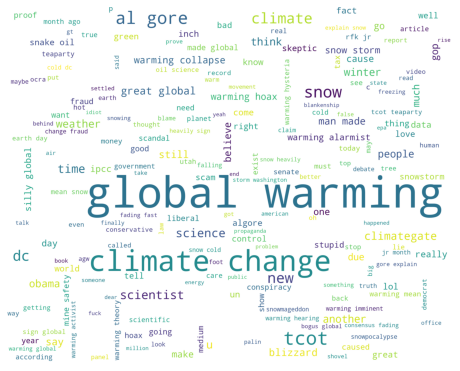

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

comment_words = ''
stoplist = set(STOPWORDS)
stoplist.add('rt')
stoplist.add('via')
stoplist.add('並')

positivedata = df[ df['existence'] == 'yes']
positivedata =positivedata['lemmatize']
negdata = df[df['existence'] == 'no']
negdata= negdata['lemmatize']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=stoplist,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata,'white')



**Bar Graphs for most used words in Postive and Negative Tweets**

Positive words are as follows


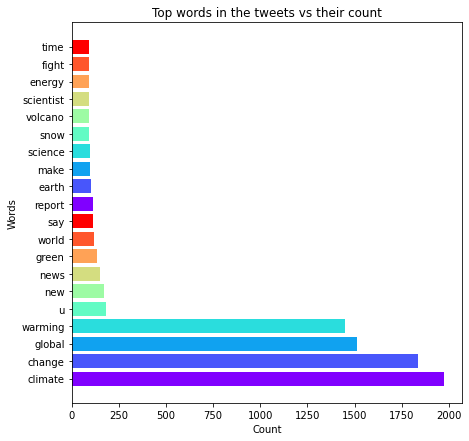

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import collections
import matplotlib.cm as cm
from matplotlib import rcParams

def bar_graph(data):
    words = ' '.join(data)
    filtered_words = [word for word in words.split() if word not in stoplist]
    counted_words = collections.Counter(filtered_words)
    words = []
    counts = []
    for letter, count in counted_words.most_common(20):
        words.append(letter)
        counts.append(count)
        colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 7, 7

    plt.title('Top words in the tweets vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

print("Positive words are as follows")
bar_graph(positivedata)


Negative words are as follows


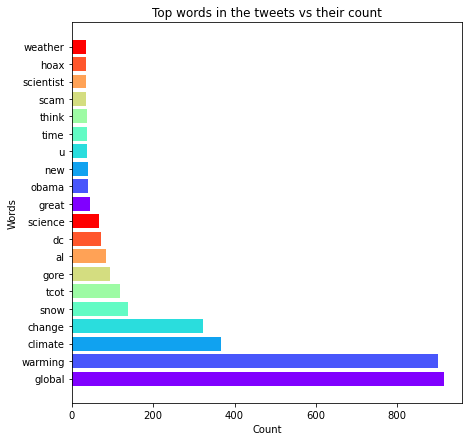

In [ ]:
print("Negative words are as follows")
bar_graph(negdata)

# Dividing data set as Train and Test sets for predictions

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

Train_X, Test_X, Train_Y1, Test_Y = model_selection.train_test_split(df['stem'],df['existence'],test_size=0.3, random_state =42)
#print(Train_Y)


In [ ]:
#encoding the classfying column

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y1)
Test_Y = Encoder.fit_transform(Test_Y)
print(Train_Y)
print(Train_Y1)



[2 0 2 ... 0 2 0]
5774        yes
5098    neutral
5428        yes
257         yes
507         yes
         ...   
3772        yes
5191         no
5226    neutral
5390        yes
860     neutral
Name: existence, Length: 4172, dtype: object


# Vectorizing the words in sentences

In [ ]:

Tfidf_vect = TfidfVectorizer(max_features=20000)
Tfidf_vect.fit(df['stem'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Tfidf_vect.vocabulary_)

#we get the unique values for every word in everysentence

{'global': 2617, 'warm': 6742, 'report': 5216, 'urg': 6591, 'govern': 2679, 'act': 61, 'brussel': 797, 'belgium': 558, 'ap': 295, 'world': 6934, 'face': 2223, 'increas': 3159, 'hunger': 3042, 'fight': 2305, 'poverti': 4867, 'africa': 111, 'carbon': 914, 'offset': 4463, 'vatican': 6641, 'forest': 2393, 'fail': 2229, 'reduc': 5146, 'uruguay': 6595, 'tool': 6330, 'need': 4253, 'vulner': 6724, 'climat': 1134, 'chang': 1006, 'rt': 5364, 'sejorg': 5530, 'jaymiheimbuch': 3339, 'ocean': 4445, 'salti': 5407, 'show': 5630, 'intensifi': 3236, 'water': 6771, 'cycl': 1490, 'evid': 2141, 'around': 348, 'us': 6596, 'messag': 3988, 'denier': 1627, 'doubter': 1814, 'look': 3750, 'migratori': 4031, 'bird': 622, 'new': 4275, 'strategi': 5969, 'stay': 5905, 'home': 2956, 'southern': 5822, 'compet': 1266, 'limpopo': 3701, 'bring': 766, 'higher': 2910, 'temperatur': 6155, 'south': 5819, 'impact': 3124, 'wheat': 6840, 'rice': 5277, 'product': 4939, 'india': 3163, 'ludhiana': 3791, 'apr': 312, 'scarciti': 544

In [ ]:
print(Train_X_Tfidf)
 #getting the TF-IDF  score for all words.

  (0, 6926)	0.2982787601577754
  (0, 6601)	0.23129399177151458
  (0, 5242)	0.35472183700870535
  (0, 4740)	0.3251223009991851
  (0, 3691)	0.21559100231100858
  (0, 3223)	0.29552276498966473
  (0, 2672)	0.2839103513069626
  (0, 2654)	0.22471127928792198
  (0, 2063)	0.23249697565514216
  (0, 1508)	0.3251223009991851
  (0, 1134)	0.06669187051354664
  (0, 1006)	0.06843561986294405
  (0, 551)	0.36700675441391084
  (0, 279)	0.2397974042570058
  (1, 6399)	0.4110451993687868
  (1, 5108)	0.4639988215946327
  (1, 5010)	0.4484672622136464
  (1, 4968)	0.39385232046322627
  (1, 3237)	0.4484672622136464
  (1, 1134)	0.16863422242811207
  (1, 1006)	0.1730433927419876
  (2, 6671)	0.18552591529072662
  (2, 5805)	0.4066117004916201
  (2, 4430)	0.25658927056461683
  (2, 4282)	0.22850126260835812
  :	:
  (4169, 1134)	0.07389253951396205
  (4169, 1006)	0.07582456011423329
  (4169, 713)	0.39302087579485206
  (4169, 520)	0.3145639294689043
  (4170, 6813)	0.35474016751821325
  (4170, 6671)	0.15355230580129428


# Prediction using Naive Bayes model

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)


Naive Bayes Accuracy Score ->  63.702460850111855


**visualization of prediction_after_using_NB**

              precision    recall  f1-score   support

         yes       0.67      0.38      0.48       523
          no       0.75      0.24      0.36       322
     neutral       0.62      0.92      0.74       943

    accuracy                           0.64      1788
   macro avg       0.68      0.51      0.53      1788
weighted avg       0.66      0.64      0.60      1788



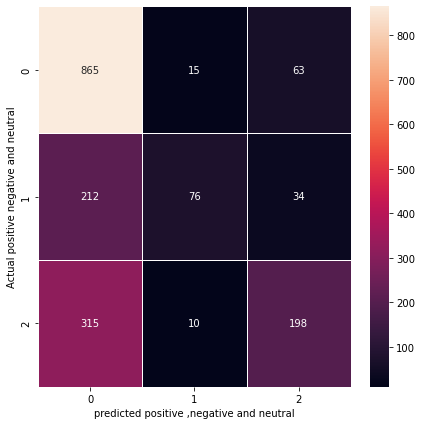

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


labels = ['yes', 'no','neutral']
label=[2,1,0]

print(classification_report(Test_Y,predictions_NB,target_names=labels))
cm = confusion_matrix(Test_Y, predictions_NB,labels=label)


sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
plt.xlabel("predicted positive ,negative and neutral")
plt.ylabel("Actual positive negative and neutral")
plt.show()

# Prediction using SVM

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  66.2192393736018


**visualization of prediction_after_using_SVM**

              precision    recall  f1-score   support

         yes       0.60      0.50      0.55       523
          no       0.64      0.48      0.54       322
     neutral       0.69      0.81      0.75       943

    accuracy                           0.66      1788
   macro avg       0.64      0.60      0.61      1788
weighted avg       0.66      0.66      0.65      1788



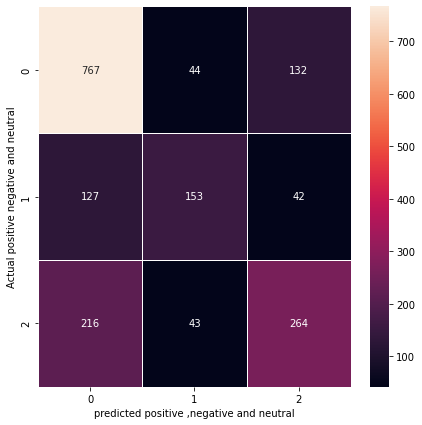

In [ ]:
print(classification_report(Test_Y,predictions_SVM,target_names=labels))
cm = confusion_matrix(Test_Y, predictions_SVM,labels=label)


sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
plt.xlabel("predicted positive ,negative and neutral")
plt.ylabel("Actual positive negative and neutral")
plt.show()

# Prediction using Logistic Regression

In [ ]:
clf=LogisticRegressionCV(scoring='accuracy',random_state=0,verbose=3,max_iter=500).fit(Train_X_Tfidf,Train_Y)
predictions_lr = clf.predict(Test_X_Tfidf)
from sklearn import metrics

print("Logistic Regression Accuracy score -> ",metrics.accuracy_score(Test_Y, predictions_lr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


Logistic Regression Accuracy score ->  0.6616331096196868


**visualization of prediction_after_using_Logistic_Regression**

              precision    recall  f1-score   support

         yes       0.59      0.53      0.56       523
          no       0.62      0.47      0.53       322
     neutral       0.70      0.80      0.75       943

    accuracy                           0.66      1788
   macro avg       0.64      0.60      0.61      1788
weighted avg       0.65      0.66      0.65      1788



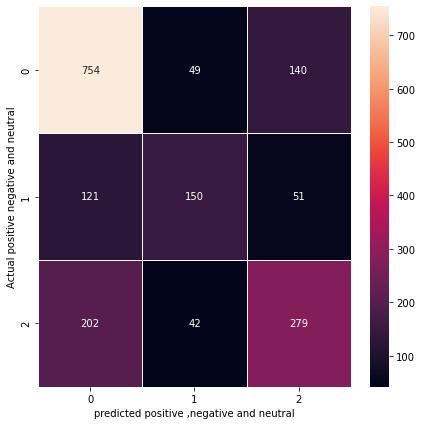

In [ ]:
print(classification_report(Test_Y,predictions_lr,target_names=labels))
cm = confusion_matrix(Test_Y, predictions_lr,labels=label)


sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
plt.xlabel("predicted positive ,negative and neutral")
plt.ylabel("Actual positive negative and neutral")
plt.show()

# --------------------------------------------END------------------------------------------